<a href="https://colab.research.google.com/github/vijaynadimpalli/USAirplaneDataAnalysis/blob/main/AirplaneDelayAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# #kaggle DataSet
 
# !mkdir ~/.kaggle
# ! cp /content/drive/'My Drive'/NEW_DATASCIENCE_PROJECTS/kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
 
# !kaggle datasets download -d tylerx/flights-and-airports-data
 
# from zipfile import ZipFile
 
# ZipFile('/content/flights-and-airports-data.zip').extractall()
 
# import pandas as pd
# import numpy as np
# import seaborn as sns
 
# df = pd.read_csv('flights.csv')

Downloadidng Data frm transstats dataset...
 https://www.transtats.bts.gov/Tables.asp?DB_ID=120&DB_Name=Airline%20On-Time%20Performance%20Data&DB_Short_Name=On-Time

Download link :: https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2000_2.zip

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=3175c87f887f62aa8cc6f2afe05c57bca979afac693fb78aed33449bb2594d48
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


Memory Optimization is extremely important when dealing with big data....
https://www.dataquest.io/blog/pandas-big-data/
Great Article which explains in detail the memory optimization process....

Also for big data Flask can be used to efficienty read huge amounts of data..
Research on this....

Adding dtypes which decrease the size dramatically ... 
For reference :: https://medium.com/@vincentteyssier/optimizing-the-size-of-a-pandas-dataframe-for-low-memory-environment-5f07db3d72e

Below method is a streamlined datatype converter post read_csv to get the best dtypes.These dtypes are manually added to read_csv later.
The conversion process below is a one-time thing.
 For reference :: https://medium.com/@vincentteyssier/optimizing-the-size-of-a-pandas-dataframe-for-low-memory-environment-5f07db3d72e

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# def floatconversion(data):
#  floatcol=[X for X in data.dtypes.index if data.dtypes[X]=='float64']
#  for col in floatcol:
#   data.loc[:,col]=pd.to_numeric(data.loc[:,col],downcast='float')
#  return data 
 
 
# def intconversion(data):
#  intcol=[X for X in data.dtypes.index if data.dtypes[X]=='int64']
#  for col in intcol:
#   data.loc[:,col]=pd.to_numeric(data.loc[:,col],downcast='integer')
#  return data 
 
# def catconversion(data):
#  catcol=[X for X in data.dtypes.index if data.dtypes[X]=='object']
#  for col in catcol:
#   num_unique_values = len(data[col].unique())
#   num_total_values = len(data[col])
#   if num_unique_values / num_total_values < 0.5:
#     data.loc[:,col] = data[col].astype('category')
#   else:
#     data.loc[:,col] = data[col]
#  return data 
 
 
# def dtypeconversion(data):
#  floatconversion(data)
#  intconversion(data)
#  catconversion(data)
#  return data 
 
# ##test steps
# df=dtypeconversion(df) #df is your dataframe which needs dtype conversion.

# create the dict of index names and optimized datatypes
# dtypes = df.dtypes
# colnames = dtypes.index
# types = [i.name for i in dtypes.values]
# column_types = dict(zip(colnames, types))

In [ ]:
file_prefix = "On_Time_Reporting_Carrier_On_Time_Performance_1987_present_"
csv_prefix = "On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_"

remove_cols = ['DOT_ID_Reporting_Airline',
       'IATA_CODE_Reporting_Airline','Flight_Number_Reporting_Airline','OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID','OriginStateFips','OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 
       'DestStateFips', 'DestWac','FirstDepTime', 'TotalAddGTime',
       'LongestAddGTime','Flights']
#List of cols to be Removed, which i felt were unnecessary for now....


# cols_for_dtype = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek','CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
#        'DepDel15', 'DepartureDelayGroups',  'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn',
#  'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups',
#  'Cancelled', 'Diverted', 'CRSElapsedTime','ActualElapsedTime', 'AirTime', 'Distance', 'DistanceGroup',
#        'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay','LateAircraftDelay'
#        ]
# col_dtype = ['uint16','uint8','uint8','uint8','uint8','uint16','uint16','int16','uint16',
#  'bool','int8','int16','uint16','uint16','int16',
#  'uint16','uint16','int16','uint16','bool','int8',
#  'bool','bool','int16','int16','int16','int16','int8',
#  'uint16','uint16','uint16','uint16','uint16'
#  ]


#Pandas does not support NaN values on int64 or bool(because NaN is a float), so you need to use Int64 or float64 or boolean
#also putting every column as float16 is causing white bars in seaborn plots so not recommended..
#pandas convert_dtypes() automatically converts to nullable dtypes. i.e floats with NaN will be converted to Int  
#but seaborn does not recognize Int64 datatype for now...so convert_dtypes is useless
#https://github.com/mwaskom/seaborn/issues/1971


cols_for_dtype = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Reporting_Airline', 'Tail_Number', 'Origin', 'OriginCityName',
       'OriginState', 'OriginStateName', 'Dest', 'DestCityName', 'DestState',
       'DestStateName', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Distance', 'DistanceGroup',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay']
 #list of cols for type change(all columns including object cols)

 #the dtype values below were chosen by running the dtypeconversion code above
col_dtype=['int16', 'int8', 'int8', 'int8', 'int8', 'category',
 'category','category','category','category','category','category','category',
 'category','category','int16','float32','float32','float32','float32','float32',
 'category','float32','float32','float32','float32','int16','float32','float32',
 'float32','float32','float32','category','float32','category','float32','float32',
 'float32','float32','float32','int8','float32','float32','float32','float32',
 'float32']



type_dict = dict(zip(cols_for_dtype,col_dtype))

print(len(cols_for_dtype))
print(len(col_dtype))

46
46


In [ ]:
import wget
from zipfile import ZipFile
import os
from os import path
import pandas as pd


def col_checker(x):
  if x in remove_cols:
    #print('Removed column : '+ x)
    return False
  if x=='Diverted':
    return True
  if x[0:3]=='Div':
    return False  
  return True


def download_extract(year_month):
  token = file_prefix  + year_month
  if os.path.exists(csv_prefix + year_month + ".csv"):
    print("File Already Exists!")
    return
  wget.download("https://transtats.bts.gov/PREZIP/"+token+".zip")
  ZipFile(token + ".zip").extractall()
  os.remove(token + ".zip")
  os.remove("readme.html")


def run_all_downloads():
  all_files = []
  year = 2019
  for month in range(1,13):
    year_month = str(year)+"_"+str(month)
    download_extract(year_month)
    all_files.append(csv_prefix + year_month + ".csv")
  return all_files


files = run_all_downloads()
#takes 15 minutes to download 1 year of data

df = pd.concat([pd.read_csv(x,usecols=col_checker,dtype=type_dict,parse_dates=['FlightDate']) for x in files],axis=0)
df.reset_index(inplace=True,drop=True)
df.dropna(how='all', axis='columns',inplace=True) # removing Unnamed: 109 columns which has all NaN values

#df.to_csv("2019_complete.csv",index=False)
#takes 5 minutes to concat and save as csv file.. 2.1GB final size

In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422037 entries, 0 to 7422036
Data columns (total 47 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Year                  int16         
 1   Quarter               int8          
 2   Month                 int8          
 3   DayofMonth            int8          
 4   DayOfWeek             int8          
 5   FlightDate            datetime64[ns]
 6   Reporting_Airline     category      
 7   Tail_Number           object        
 8   Origin                object        
 9   OriginCityName        object        
 10  OriginState           category      
 11  OriginStateName       category      
 12  Dest                  object        
 13  DestCityName          object        
 14  DestState             category      
 15  DestStateName         category      
 16  CRSDepTime            int16         
 17  DepTime               float32       
 18  DepDelay              float32       
 19  

In [ ]:
df.isna().sum()

Year                          0
Quarter                       0
Month                         0
DayofMonth                    0
DayOfWeek                     0
FlightDate                    0
Reporting_Airline             0
Tail_Number               17837
Origin                        0
OriginCityName                0
OriginState                   0
OriginStateName               0
Dest                          0
DestCityName                  0
DestState                     0
DestStateName                 0
CRSDepTime                    0
DepTime                  130086
DepDelay                 130110
DepDelayMinutes          130110
DepDel15                 130110
DepartureDelayGroups     130110
DepTimeBlk                    0
TaxiOut                  133977
WheelsOff                133977
WheelsOn                 137647
TaxiIn                   137647
CRSArrTime                    0
ArrTime                  137646
ArrDelay                 153805
ArrDelayMinutes          153805
ArrDel15

In [ ]:
# import numpy as np
# print(np.finfo('float16'))
# print(np.iinfo('int16'))

In [ ]:
%%time
df['Reporting_Airline'].value_counts()

CPU times: user 45.7 ms, sys: 53 µs, total: 45.7 ms
Wall time: 47 ms


WN    1363946
DL     991986
AA     946776
OO     836445
UA     625910
YX     329149
MQ     327007
B6     297411
OH     289304
AS     264816
9E     257132
YV     227888
NK     204845
F9     135543
EV     134683
G4     105305
HA      83891
Name: Reporting_Airline, dtype: int64

In [ ]:
df.groupby(by='Reporting_Airline')['DepDelay','ArrDelay'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,DepDelay,ArrDelay
Reporting_Airline,,
OO,12.564054,7.184953
AS,5.034637,1.351394
9E,10.245765,3.063844
AA,12.114915,6.965412
MQ,9.272982,6.882879
WN,10.178762,2.577351
G4,10.122910,8.005639
OH,10.704734,6.706320
B6,17.745474,11.223515


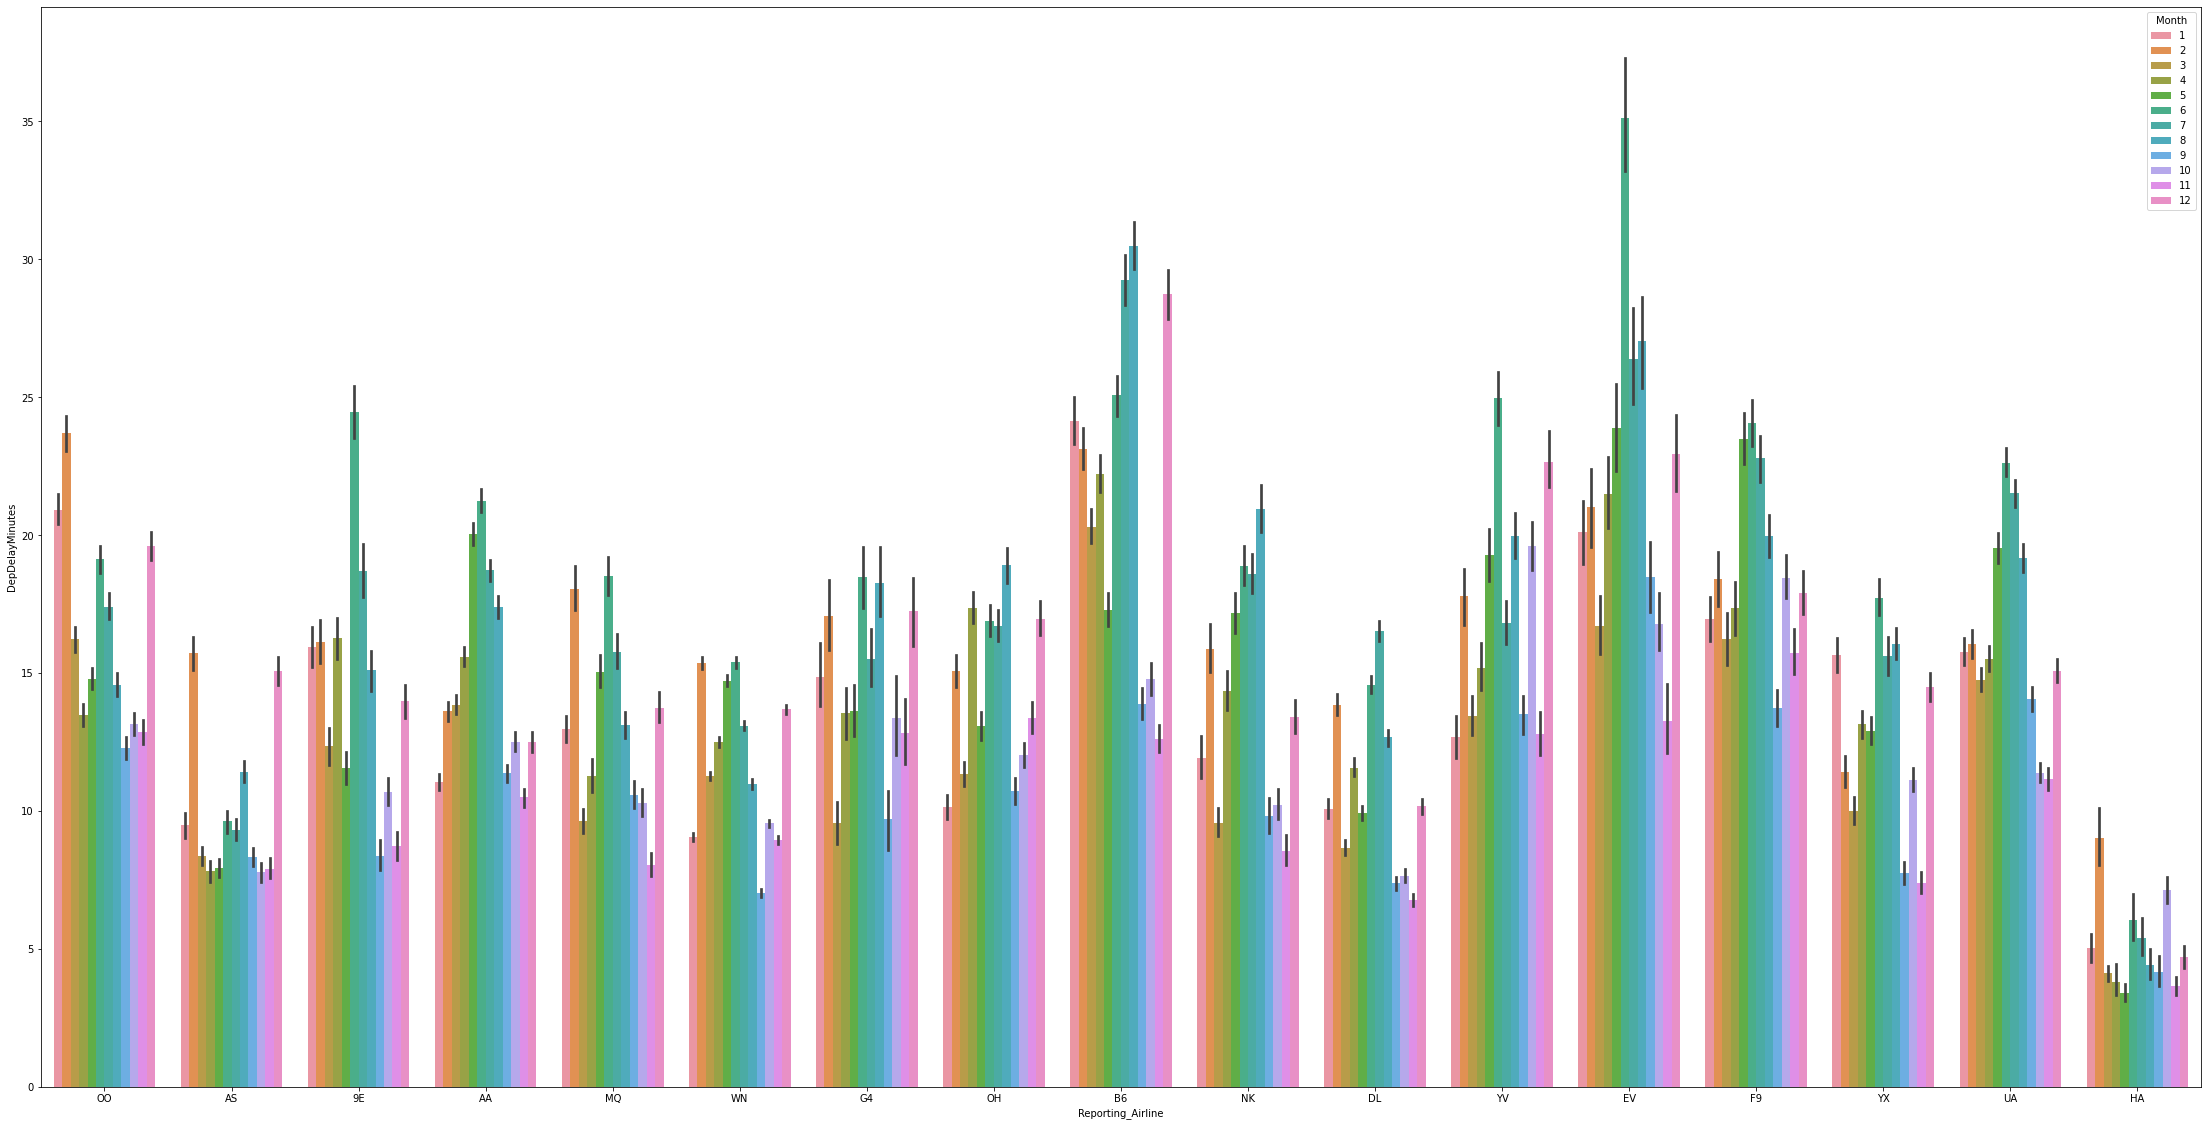

In [ ]:
fig = plt.figure(figsize=(30,15))
ax = fig.add_axes([0,0,1,1])
sns.barplot(ax=ax,x='Reporting_Airline',y='DepDelayMinutes',data=df,hue='Month')

In [ ]:
#Continue EDA tomorrow

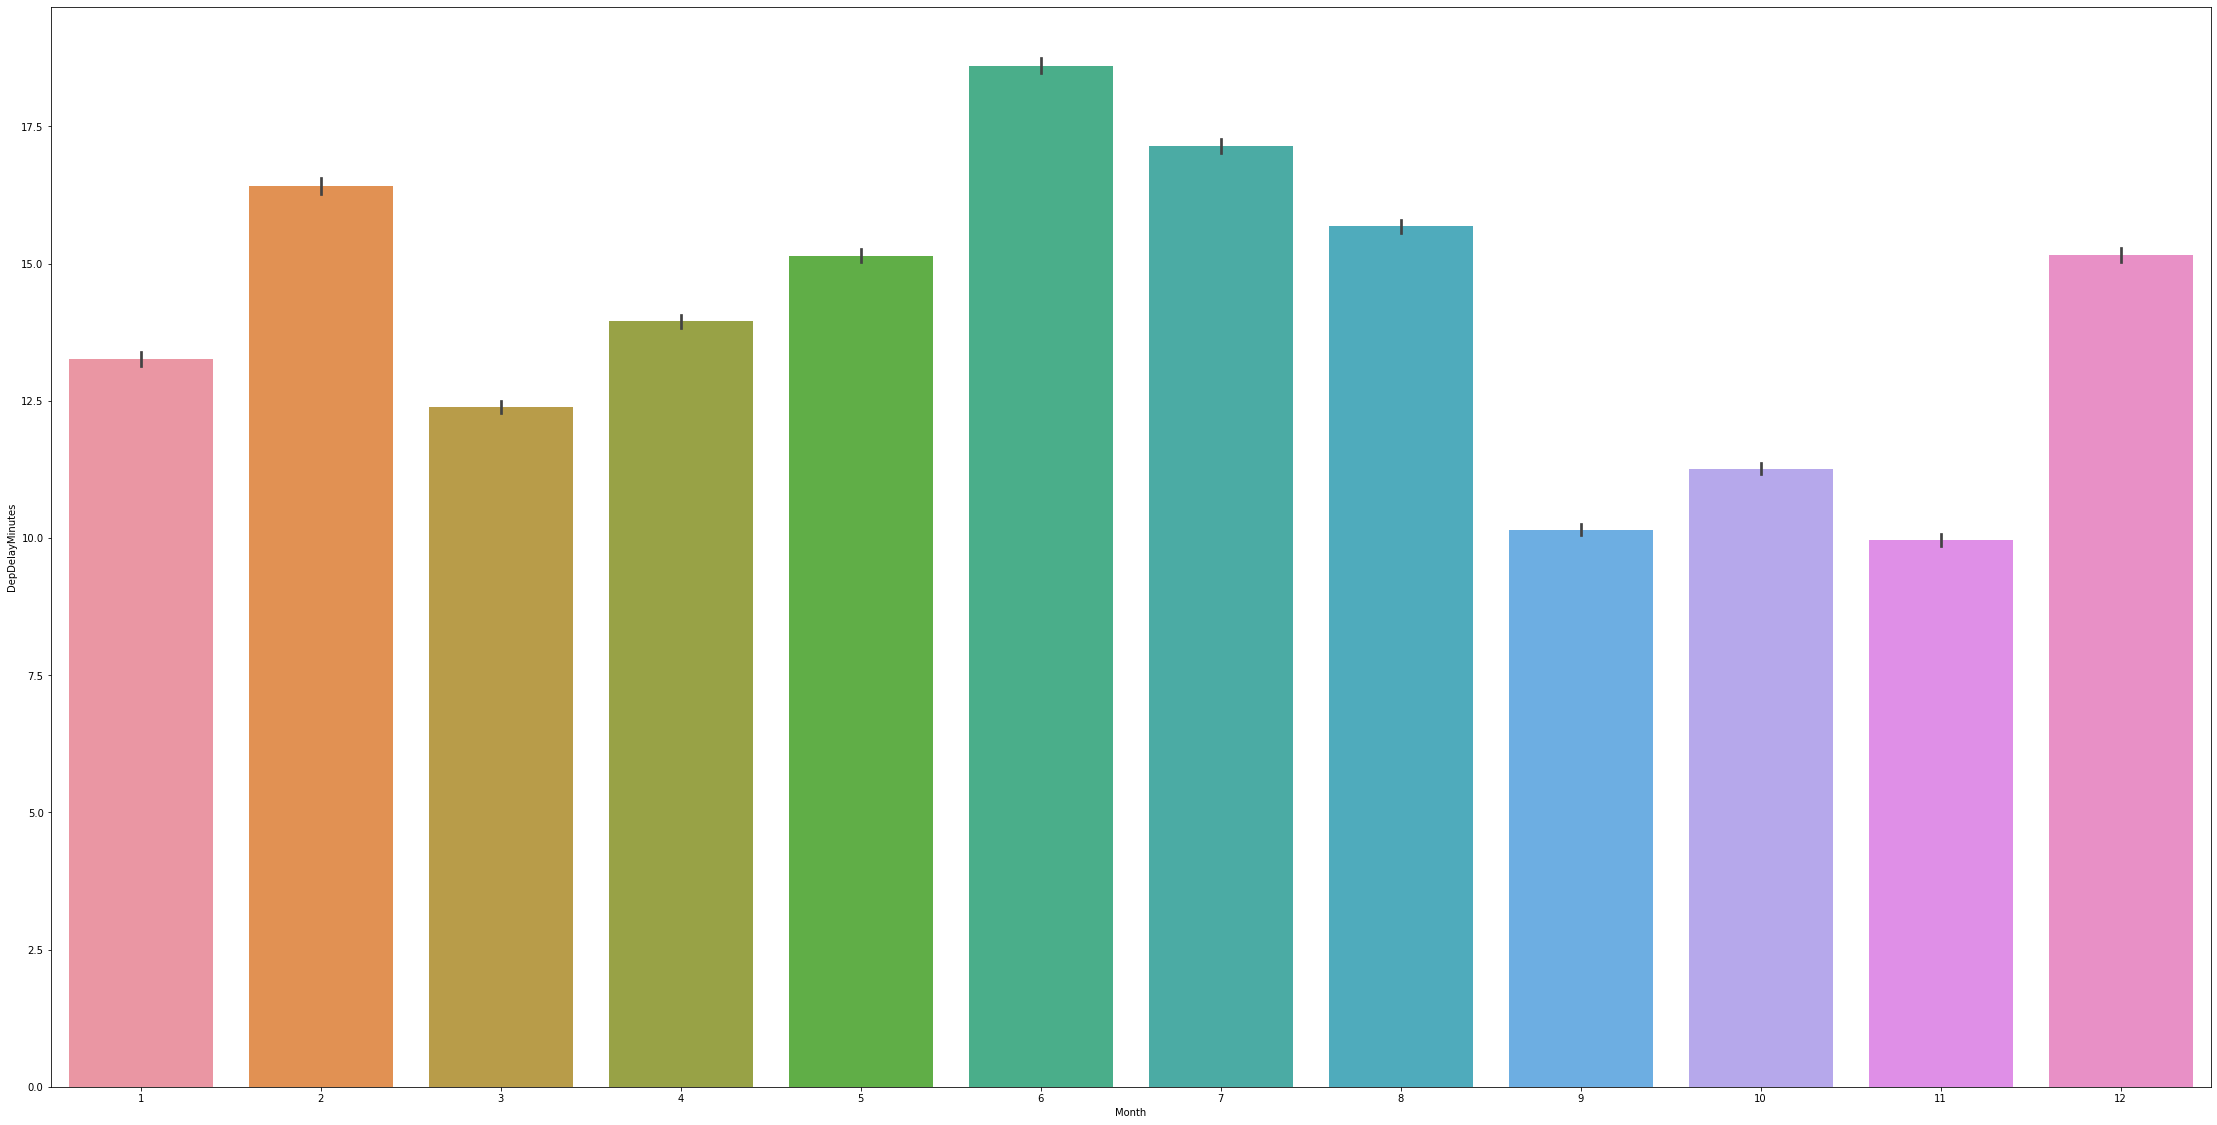

In [ ]:
fig = plt.figure(figsize=(30,15))
ax = fig.add_axes([0,0,1,1])
sns.barplot(ax=ax,x='Month',data=df,y='DepDelayMinutes',edgecolor='none')

In [ ]:
pd.melt(df[['ArrDelayMinutes','DepDelayMinutes','Month']],id_vars=['Month'])

,Month,variable,value
0,1,ArrDelayMinutes,0.0
1,1,ArrDelayMinutes,1.0
2,1,ArrDelayMinutes,0.0
3,1,ArrDelayMinutes,0.0
4,1,ArrDelayMinutes,0.0
...,...,...,...
14844069,12,DepDelayMinutes,7.0
14844070,12,DepDelayMinutes,49.0
14844071,12,DepDelayMinutes,1.0
14844072,12,DepDelayMinutes,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


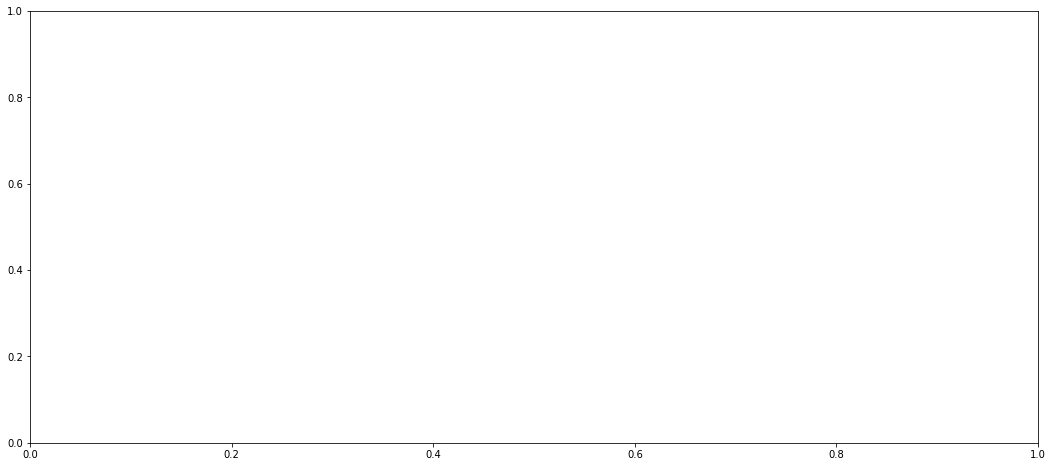

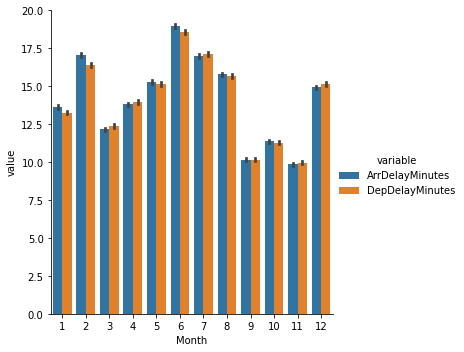

In [ ]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_axes([0,0,1,1])
sns.catplot(ax=ax,data=pd.melt(df[['ArrDelayMinutes','DepDelayMinutes','Month']],id_vars=['Month']),kind='bar',x='Month',hue='variable',y='value')

In [ ]:
df.dtypes.values

array([dtype('int16'), dtype('int8'), dtype('int8'), dtype('int8'),
       dtype('int8'), dtype('<M8[ns]'),
       CategoricalDtype(categories=['OO', 'AS', '9E', 'AA', 'MQ', 'WN', 'G4', 'OH', 'B6', 'NK',
                  'DL', 'YV', 'EV', 'F9', 'YX', 'UA', 'HA'],
                 ordered=False),
       dtype('O'), dtype('O'), dtype('O'),
       CategoricalDtype(categories=['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'FL', 'GA', 'IA', 'ID',
                  'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'ME', 'MI', 'MN', 'MO',
                  'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY',
                  'OH', 'OK', 'OR', 'PA', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
                  'VT', 'WA', 'WI', 'WV', 'WY', 'MD', 'AK', 'HI', 'RI', 'PR',
                  'VI', 'TT'],
                 ordered=False),
       CategoricalDtype(categories=['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
                  'Connecticut', 'Florida', 'Georgia', 'Idaho', 'Illinois',
               

In [ ]:
df['Tail_Number'].value_counts()
#Most flown flights

N485HA    3697
N492HA    3608
N481HA    3596
N480HA    3587
N490HA    3485
          ... 
N802AE       1
N510DN       1
N509DN       1
N512DN       1
N404DX       1
Name: Tail_Number, Length: 5891, dtype: int64

In [ ]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Tail_Number', 'Origin', 'OriginCityName',
       'OriginState', 'OriginStateName', 'Dest', 'DestCityName', 'DestState',
       'DestStateName', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Distance', 'DistanceGroup',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')

In [ ]:
df.groupby(by=['OriginCityName','DestCityName'])['Year'].count().sort_values(ascending=False)
#Busiest Routes

OriginCityName   DestCityName      
Chicago, IL      New York, NY          19876
New York, NY     Chicago, IL           19869
                 Boston, MA            15806
Boston, MA       New York, NY          15749
Los Angeles, CA  San Francisco, CA     14630
                                       ...  
South Bend, IN   Los Angeles, CA           1
                 Raleigh/Durham, NC        1
Lincoln, NE      Columbus, OH              1
Spokane, WA      Lewiston, ID              1
Boise, ID        Lewiston, ID              1
Name: Year, Length: 6039, dtype: int64

In [ ]:
#does dep delay contribute to arr delay...
#aiprot with most delays..
#airline with most delays...
#corr() for delays with other factors...
#Types of delays...
#Cancelled statistics...

#Route wise monthly dist of num of flights for top 5 busiest routes
#filling delay using monthly average of particular routes..
#and using traffic at that airport at that particular time to predict delay...
#analysing passenger capacity and occupancy on flights using a different dataset...
#time wise and datewise passenger occupany analysis, categorise according to flight type
#airpots with most arrival routes and busiest

In [ ]:
df['Cancelled'].value_counts()

0.0    7287112
1.0     134925
Name: Cancelled, dtype: int64

In [ ]:
df

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Origin,OriginCityName,OriginState,OriginStateName,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2019,1,1,4,5,2019-01-04,OO,N945SW,SBP,"San Luis Obispo, CA",CA,California,SFO,"San Francisco, CA",CA,California,1400,1353.0,-7.0,0.0,0.0,-1.0,1400-1459,9.0,1402.0,1439.0,5.0,1510,1444.0,-26.0,0.0,0.0,-2.0,1500-1559,0.0,NaN,0.0,70.0,51.0,37.0,190.0,1,NaN,NaN,NaN,NaN,NaN
1,2019,1,1,4,5,2019-01-04,OO,N932SW,IAH,"Houston, TX",TX,Texas,XNA,"Fayetteville, AR",AR,Arkansas,935,930.0,-5.0,0.0,0.0,-1.0,0900-0959,27.0,957.0,1113.0,6.0,1118,1119.0,1.0,1.0,0.0,0.0,1100-1159,0.0,NaN,0.0,103.0,109.0,76.0,438.0,2,NaN,NaN,NaN,NaN,NaN
2,2019,1,1,4,5,2019-01-04,OO,N932SW,SGF,"Springfield, MO",MO,Missouri,IAH,"Houston, TX",TX,Texas,643,637.0,-6.0,0.0,0.0,-1.0,0600-0659,17.0,654.0,822.0,16.0,855,838.0,-17.0,0.0,0.0,-2.0,0800-0859,0.0,NaN,0.0,132.0,121.0,88.0,513.0,3,NaN,NaN,NaN,NaN,NaN
3,2019,1,1,4,5,2019-01-04,OO,N916SW,ISN,"Williston, ND",ND,North Dakota,DEN,"Denver, CO",CO,Colorado,1335,1314.0,-21.0,0.0,0.0,-2.0,1300-1359,23.0,1337.0,1357.0,7.0,1433,1404.0,-29.0,0.0,0.0,-2.0,1400-1459,0.0,NaN,0.0,118.0,110.0,80.0,576.0,3,NaN,NaN,NaN,NaN,NaN
4,2019,1,1,4,5,2019-01-04,OO,N107SY,MKE,"Milwaukee, WI",WI,Wisconsin,DEN,"Denver, CO",CO,Colorado,836,826.0,-10.0,0.0,0.0,-1.0,0800-0859,26.0,852.0,959.0,10.0,1040,1009.0,-31.0,0.0,0.0,-2.0,1000-1059,0.0,NaN,0.0,184.0,163.0,127.0,896.0,4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422032,2019,4,12,22,7,2019-12-22,WN,N7738A,DAL,"Dallas, TX",TX,Texas,MCI,"Kansas City, MO",MO,Missouri,1215,1222.0,7.0,7.0,0.0,0.0,1200-1259,8.0,1230.0,1345.0,9.0,1345,1354.0,9.0,9.0,0.0,0.0,1300-1359,0.0,NaN,0.0,90.0,92.0,75.0,461.0,2,NaN,NaN,NaN,NaN,NaN
7422033,2019,4,12,22,7,2019-12-22,WN,N298WN,DAL,"Dallas, TX",TX,Texas,MCI,"Kansas City, MO",MO,Missouri,1650,1739.0,49.0,49.0,1.0,3.0,1600-1659,9.0,1748.0,1904.0,3.0,1820,1907.0,47.0,47.0,1.0,3.0,1800-1859,0.0,NaN,0.0,90.0,88.0,76.0,461.0,2,0.0,0.0,0.0,0.0,47.0
7422034,2019,4,12,22,7,2019-12-22,WN,N486WN,DAL,"Dallas, TX",TX,Texas,MCI,"Kansas City, MO",MO,Missouri,2200,2201.0,1.0,1.0,0.0,0.0,2200-2259,20.0,2221.0,2336.0,4.0,2330,2340.0,10.0,10.0,0.0,0.0,2300-2359,0.0,NaN,0.0,90.0,99.0,75.0,461.0,2,NaN,NaN,NaN,NaN,NaN
7422035,2019,4,12,22,7,2019-12-22,WN,N7823A,DAL,"Dallas, TX",TX,Texas,MCI,"Kansas City, MO",MO,Missouri,605,603.0,-2.0,0.0,0.0,-1.0,0600-0659,11.0,614.0,729.0,5.0,735,734.0,-1.0,0.0,0.0,-1.0,0700-0759,0.0,NaN,0.0,90.0,91.0,75.0,461.0,2,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Tail_Number', 'Origin', 'OriginCityName',
       'OriginState', 'OriginStateName', 'Dest', 'DestCityName', 'DestState',
       'DestStateName', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Distance', 'DistanceGroup',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')

In [ ]:
df['Origin'].value_counts()

ATL    395009
ORD    339606
DFW    304344
DEN    252026
CLT    235496
        ...  
HYA        83
DLG        82
GST        82
PGV        80
AKN        61
Name: Origin, Length: 360, dtype: int64

In [ ]:
df['DepTime'].isna().sum()

130086

(2,)


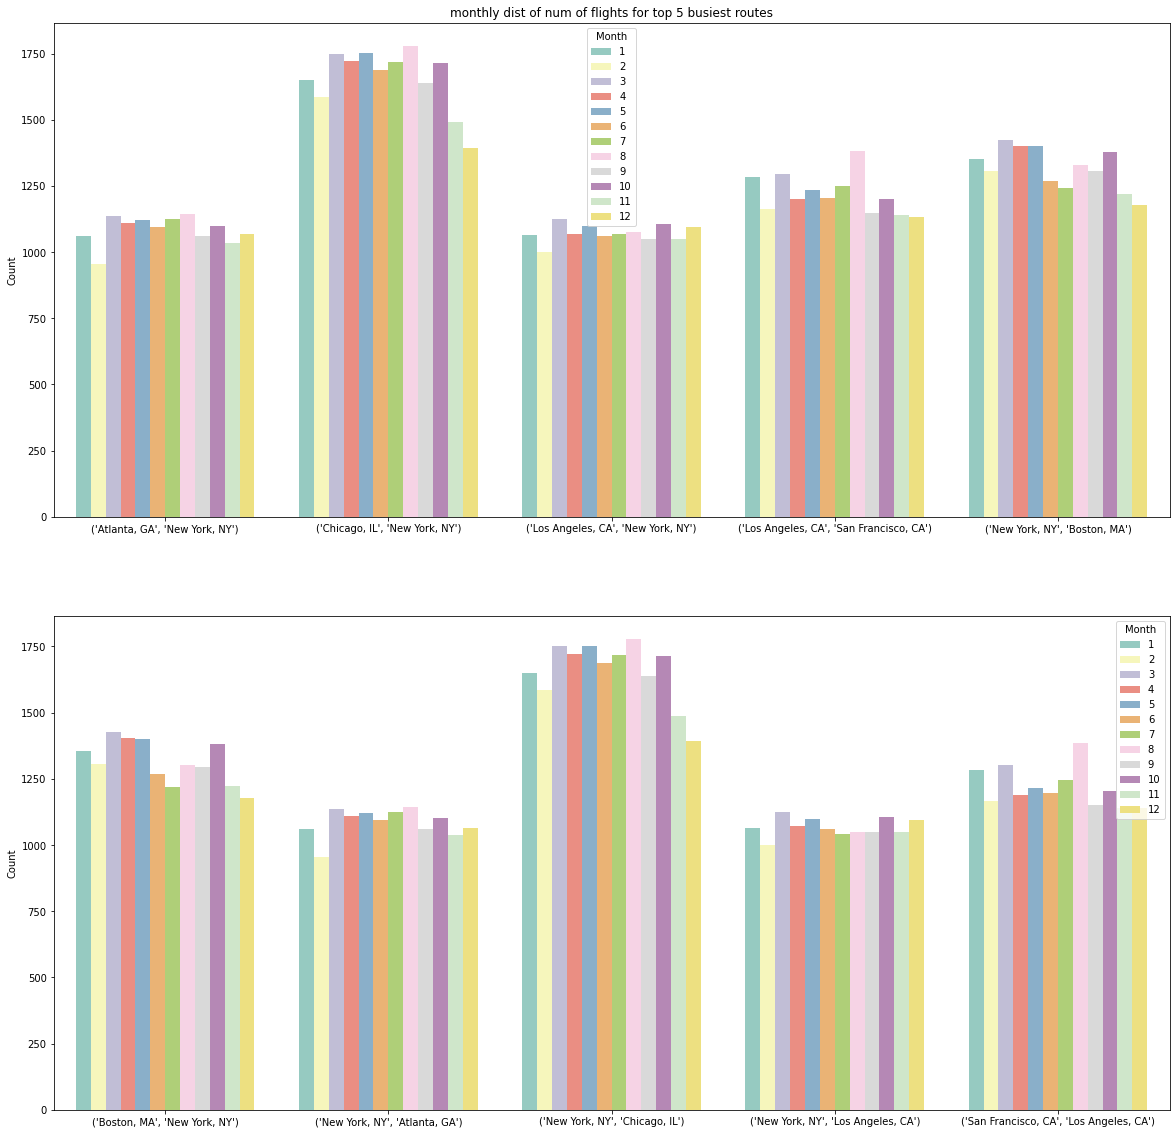

In [ ]:
ind=df.groupby(by=['OriginCityName','DestCityName'])['Year'].count().sort_values(ascending=False).index[:10:2]
ind1=df.groupby(by=['OriginCityName','DestCityName'])['Year'].count().sort_values(ascending=False).index[1:10:2]

#print(ind)
# start = ind.get_level_values('OriginCityName')
# end = ind.get_level_values('DestCityName')
# print(start)
# print(end)


dat=df.groupby(by=['OriginCityName','DestCityName','Month'])[['Year']].count().reset_index(2).rename({'Year':'Count'},axis=1).loc[lambda df:df.apply(lambda x: x.name in ind,axis=1),:]
#print(dat)
dat1=df.groupby(by=['OriginCityName','DestCityName','Month'])[['Year']].count().reset_index(2).rename({'Year':'Count'},axis=1).loc[lambda df:df.apply(lambda x: x.name in ind1,axis=1),:]
fig, axs = plt.subplots(2, 1, figsize=(20,20))
#ax=fig.add_axes([0,0,1,1])
print(axs.shape)
sns.barplot(x=dat.index,y=dat['Count'],hue=dat['Month'],palette='Set3',ax=axs[0])
axs[0].set_title("monthly dist of num of flights for top 5 busiest routes")
sns.barplot(x=dat1.index,y=dat1['Count'],hue=dat1['Month'],palette='Set3',ax=axs[1])

Text(0.5, 1.0, 'Number of Cancellations per Airline')

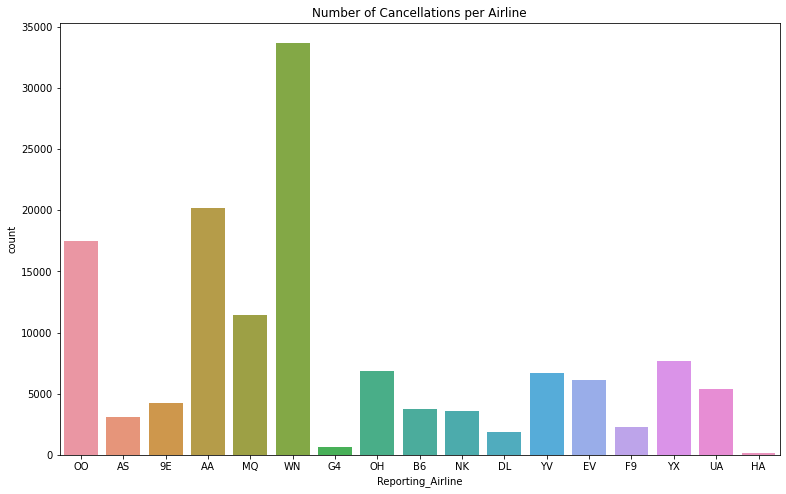

In [ ]:
#Airline Cancellations record
fig=plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
sns.countplot(ax=ax,x='Reporting_Airline',data=df.loc[df['Cancelled']==1,:])
ax.set_title('Number of Cancellations per Airline')

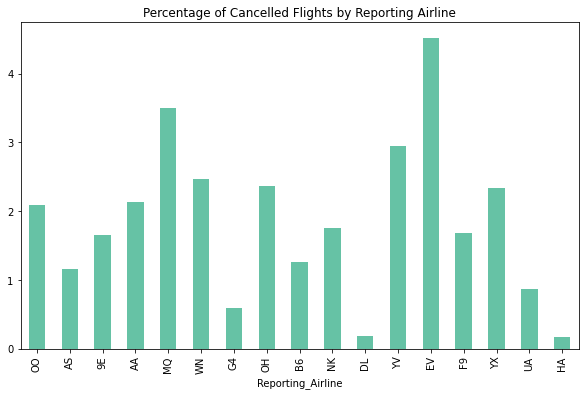

In [ ]:
ax=(df.loc[df['Cancelled']==1,:].groupby(by='Reporting_Airline')['Year'].count()*100 / df.groupby(by='Reporting_Airline')['Year'].count()).plot(kind='bar',figsize=(10,6),cmap='Set2')
ax.set_title("Percentage of Cancelled Flights by Reporting Airline");

In [ ]:
df.loc[0:1000,['OriginCityName','DestCityName']].apply(lambda x:[min(x['OriginCityName'],x['DestCityName']),max(x['OriginCityName'],x['DestCityName'])],axis=1)

0       [San Francisco, CA, San Luis Obispo, CA]
1                [Fayetteville, AR, Houston, TX]
2                 [Houston, TX, Springfield, MO]
3                    [Denver, CO, Williston, ND]
4                    [Denver, CO, Milwaukee, WI]
                          ...                   
996            [Minneapolis, MN, Rapid City, SD]
997                   [Detroit, MI, Houston, TX]
998                   [Detroit, MI, Houston, TX]
999                [Milwaukee, WI, New York, NY]
1000                 [Atlanta, GA, Valdosta, GA]
Length: 1001, dtype: object

In [ ]:
#look at difference between using .loc and using two bracksts like df[][]
#Extremely Improtant read documentation...
#.loc is always preferred to chained indexing...
#[] returns a lower order slice.. not a dataframe
test = df[0:1000]
print(type(test))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#pandas where and mask
#transform vs apply https://www.analyticsvidhya.com/blog/2020/03/understanding-transform-function-python/


In [ ]:
#Airports with highest departure avg delays

df.groupby(by='OriginCityName')[['DepDelayMinutes']].mean().sort_values(by='DepDelayMinutes',ascending=False)

,DepDelayMinutes
OriginCityName,
"North Bend/Coos Bay, OR",38.171745
"Mammoth Lakes, CA",35.853657
"Meridian, MS",34.480423
"Hyannis, MA",33.542168
"Nantucket, MA",33.289906
...,...
"Deadhorse, AK",4.562887
"Nome, AK",3.647399
"Hilo, HI",3.640354


In [ ]:
#Airports with highest arrival avg delays
df.groupby(by='DestCityName')[['ArrDelayMinutes']].mean().sort_values(by='ArrDelayMinutes',ascending=False)

,ArrDelayMinutes
DestCityName,
"Ogdensburg, NY",32.026211
"Staunton, VA",30.581259
"Devils Lake, ND",29.673504
"Marquette, MI",29.200293
"Laramie, WY",27.816326
...,...
"Lewiston, ID",4.393259
"West Yellowstone, MT",3.771318
"Barrow, AK",3.649499


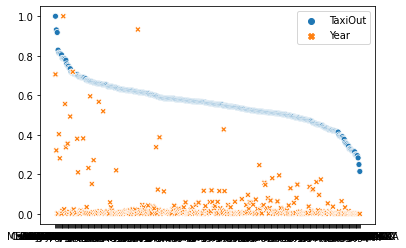

In [ ]:
col1 = df.groupby(by='OriginCityName')[['TaxiOut']].mean().sort_values(by='TaxiOut',ascending=False)
col2 = df.groupby(by='OriginCityName')[['Year']].count().sort_values(by='Year',ascending=False)
col = pd.concat([col1,col2],axis=1)
sns.scatterplot(data=col/col.max())

In [ ]:
df.corr()

,Year,Quarter,Month,DayofMonth,DayOfWeek,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quarter,NaN,1.000000,0.970532,0.005507,-0.005224,-0.000297,-0.002841,-0.016102,-0.016202,-0.020987,-0.020884,-0.020188,-0.003709,-0.009196,0.009791,-0.010532,-0.009261,-0.021498,-0.018875,-0.026449,-0.027541,-0.045986,-0.003699,-0.007084,-0.012462,-0.010845,-0.001430,-0.001441,0.001062,-0.012515,-0.007644,-0.003331,-0.003503
Month,NaN,0.970532,1.000000,0.004140,0.005966,-0.000009,-0.002244,-0.015004,-0.015440,-0.018633,-0.019130,-0.020165,-0.003218,-0.009200,0.009887,-0.010770,-0.009336,-0.020403,-0.018191,-0.024522,-0.025963,-0.047177,-0.003743,-0.006243,-0.011678,-0.010051,-0.000789,-0.000820,0.001000,-0.014576,-0.010293,-0.002341,-0.002578
DayofMonth,NaN,0.005507,0.004140,1.000000,0.007803,-0.001098,-0.001390,0.002593,0.002282,0.001518,0.002965,-0.000240,-0.001565,-0.002962,0.001268,-0.002121,-0.002903,0.001180,0.001778,0.001154,0.001186,0.009042,0.000826,0.002701,0.002329,0.002329,0.002441,0.002387,-0.000805,0.002652,0.007097,-0.005192,-0.000164
DayOfWeek,NaN,-0.005224,0.005966,0.007803,1.000000,0.004656,0.003060,0.000108,-0.000497,-0.000653,-0.001027,-0.018933,0.002039,0.002120,0.006795,0.003600,0.002126,-0.002702,-0.001307,-0.003249,-0.004358,-0.006883,0.002243,0.012035,0.009861,0.012250,0.014111,0.014063,0.011140,0.004843,-0.013017,0.004920,-0.004659
CRSDepTime,NaN,-0.000297,-0.000009,-0.001098,0.004656,1.000000,0.955878,0.098560,0.093044,0.165288,0.137207,0.001504,0.929004,0.625651,-0.041854,0.683573,0.595320,0.093351,0.082713,0.136379,0.121697,0.016146,0.000916,-0.019527,-0.019208,-0.016306,-0.010483,-0.011529,-0.053511,-0.003581,-0.048808,-0.006023,0.123247
DepTime,NaN,-0.002841,-0.002244,-0.001390,0.003060,0.955878,1.000000,0.129090,0.121809,0.213740,0.192266,0.011986,0.970380,0.650660,-0.037224,0.683586,0.619364,0.124973,0.111338,0.180332,0.174304,0.009225,0.002827,-0.022660,-0.021384,-0.020423,-0.016014,-0.017042,-0.057970,-0.026067,-0.027923,-0.002186,0.142550
DepDelay,NaN,-0.016102,-0.015004,0.002593,0.000108,0.098560,0.129090,1.000000,0.997411,0.582207,0.852087,0.066767,0.119031,0.025410,0.014813,0.084275,0.018065,0.963505,0.974480,0.535807,0.800920,0.025973,0.017937,0.019050,0.024560,0.014564,0.013826,0.013696,0.644940,0.305893,0.201179,0.023587,0.508841
DepDelayMinutes,NaN,-0.016202,-0.015440,0.002282,-0.000497,0.093044,0.121809,0.997411,1.000000,0.563300,0.838494,0.065457,0.111910,0.019479,0.020051,0.078866,0.012576,0.961280,0.978153,0.520056,0.789345,0.025689,0.017364,0.014463,0.020153,0.009751,0.008608,0.008528,0.645729,0.306448,0.203352,0.023530,0.508140
DepDel15,NaN,-0.020987,-0.018633,0.001518,-0.000653,0.165288,0.213740,0.582207,0.563300,1.000000,0.759163,0.075302,0.205828,0.095925,-0.001684,0.135006,0.085606,0.564985,0.519993,0.744596,0.696187,0.023169,0.017913,0.023440,0.029408,0.019813,0.020226,0.020250,0.152271,0.057642,-0.103343,0.012253,0.259702


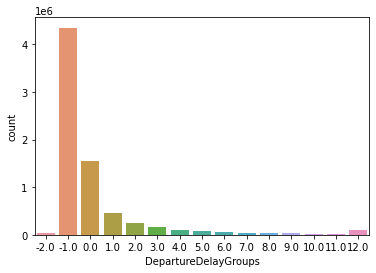

In [ ]:
#Departure Delay is strongly linked to arrival delay...
#let's see which aircraft(airline) managed to reduce the arrival dealy from departure delay...
sns.countplot(x='DepartureDelayGroups',data=df)

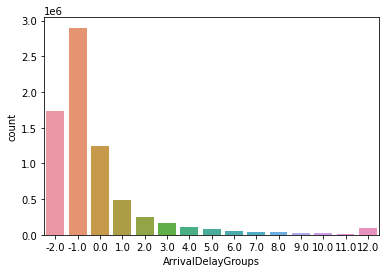

In [ ]:
sns.countplot(x='ArrivalDelayGroups',data=df)

In [ ]:
df.loc[df['CarrierDelay'].isna()==False].groupby(by='Reporting_Airline')[['DepDelayMinutes','ArrDelayMinutes','CarrierDelay']].mean().sort_values(by='CarrierDelay',ascending=False)

,DepDelayMinutes,ArrDelayMinutes,CarrierDelay
Reporting_Airline,,,
OO,80.929611,84.621803,30.036854
B6,79.007133,81.274399,27.614935
YV,77.544250,80.978493,27.319139
EV,80.461426,87.124336,26.886286
HA,32.670460,40.254776,25.873865
G4,64.683578,69.900932,25.243767
DL,63.567329,68.335899,24.438005
AA,62.185986,67.128937,22.366356
9E,75.338348,79.479523,20.529898


In [ ]:
#try to find amount of traffic near a tail number to get correlation with delays and taxi time....

In [ ]:
# print(df.groupby(['FlightDate','Origin','DepTimeBlk'])[['Year']].count())
# print(df.groupby(['FlightDate','Dest','ArrTimeBlk'])[['Year']].count())

A = df.groupby(['FlightDate','Origin','DepTimeBlk'])[['Year']].count()
B = df.groupby(['FlightDate','Dest','ArrTimeBlk'])[['Year']].count()

In [ ]:
Airport_Traffic = pd.concat([A,B],axis=1,ignore_index=True)
Airport_Traffic.index.set_names(['Date','Airport','TimeBlk'],inplace=True)
Airport_Traffic.fillna(0,inplace=True)
Airport_Traffic['Count'] = Airport_Traffic.loc[:,0] + Airport_Traffic.loc[:,1]
Airport_Traffic.drop([0,1],axis=1,inplace=True)
print(Airport_Traffic.sort_values(by='Count',ascending=False).head(20))

                              Count
Date       Airport TimeBlk         
2019-07-17 ATL     0800-0859  199.0
2019-08-07 ATL     0800-0859  198.0
2019-07-31 ATL     0800-0859  198.0
2019-07-19 ATL     0800-0859  198.0
2019-07-15 ATL     0800-0859  198.0
2019-07-29 ATL     0800-0859  198.0
2019-07-26 ATL     0800-0859  198.0
2019-08-05 ATL     0800-0859  198.0
2019-07-24 ATL     0800-0859  198.0
2019-07-22 ATL     0800-0859  198.0
2019-06-25 ATL     0800-0859  197.0
2019-07-08 ATL     0800-0859  197.0
2019-07-12 ATL     0800-0859  197.0
2019-06-26 ATL     0800-0859  197.0
2019-07-23 ATL     0800-0859  197.0
2019-07-10 ATL     0800-0859  197.0
2019-07-30 ATL     0800-0859  197.0
2019-08-09 ATL     0800-0859  197.0
2019-06-28 ATL     0800-0859  197.0
2019-06-21 ATL     0800-0859  197.0


In [ ]:
df = pd.merge(df,Airport_Traffic,left_on=['FlightDate','Origin','DepTimeBlk'],right_index=True).rename({'Count':'TrafficDepBlk'},axis=1)
df = pd.merge(df,Airport_Traffic,left_on=['FlightDate','Dest','ArrTimeBlk'],right_index=True).rename({'Count':'TrafficArrBlk'},axis=1)

In [ ]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Tail_Number', 'Origin', 'OriginCityName',
       'OriginState', 'OriginStateName', 'Dest', 'DestCityName', 'DestState',
       'DestStateName', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Distance', 'DistanceGroup',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'TrafficDepBlk', 'TrafficArrBlk'],
      dtype='object')

In [ ]:
df

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Origin,OriginCityName,OriginState,OriginStateName,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TrafficDepBlk,TrafficArrBlk
0,2019,1,1,4,5,2019-01-04,OO,N945SW,SBP,"San Luis Obispo, CA",CA,California,SFO,"San Francisco, CA",CA,California,1400,1353.0,-7.0,0.0,0.0,-1.0,1400-1459,9.0,1402.0,1439.0,5.0,1510,1444.0,-26.0,0.0,0.0,-2.0,1500-1559,0.0,NaN,0.0,70.0,51.0,37.0,190.0,1,NaN,NaN,NaN,NaN,NaN,1.0,51.0
537586,2019,1,1,4,5,2019-01-04,UA,N66803,DEN,"Denver, CO",CO,Colorado,SFO,"San Francisco, CA",CA,California,1400,1441.0,41.0,41.0,1.0,2.0,1400-1459,9.0,1450.0,1558.0,5.0,1543,1603.0,20.0,20.0,1.0,1.0,1500-1559,0.0,NaN,0.0,163.0,142.0,128.0,967.0,4,0.0,0.0,0.0,0.0,20.0,73.0,51.0
244774,2019,1,1,4,5,2019-01-04,WN,N7825A,LAX,"Los Angeles, CA",CA,California,SFO,"San Francisco, CA",CA,California,1435,1433.0,-2.0,0.0,0.0,-1.0,1400-1459,8.0,1441.0,1531.0,6.0,1555,1537.0,-18.0,0.0,0.0,-2.0,1500-1559,0.0,NaN,0.0,80.0,64.0,50.0,337.0,2,NaN,NaN,NaN,NaN,NaN,65.0,51.0
389881,2019,1,1,4,5,2019-01-04,DL,N945AT,LAX,"Los Angeles, CA",CA,California,SFO,"San Francisco, CA",CA,California,1400,1359.0,-1.0,0.0,0.0,-1.0,1400-1459,36.0,1435.0,1528.0,3.0,1530,1531.0,1.0,1.0,0.0,0.0,1500-1559,0.0,NaN,0.0,90.0,92.0,53.0,337.0,2,NaN,NaN,NaN,NaN,NaN,65.0,51.0
537927,2019,1,1,4,5,2019-01-04,UA,N471UA,LAX,"Los Angeles, CA",CA,California,SFO,"San Francisco, CA",CA,California,1400,1353.0,-7.0,0.0,0.0,-1.0,1400-1459,23.0,1416.0,1512.0,5.0,1529,1517.0,-12.0,0.0,0.0,-1.0,1500-1559,0.0,NaN,0.0,89.0,84.0,56.0,337.0,2,NaN,NaN,NaN,NaN,NaN,65.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7418911,2019,4,12,21,6,2019-12-21,WN,N940WN,HOU,"Houston, TX",TX,Texas,HRL,"Harlingen/San Benito, TX",TX,Texas,1125,1125.0,0.0,0.0,0.0,0.0,1100-1159,8.0,1133.0,1224.0,6.0,1240,1230.0,-10.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,75.0,65.0,51.0,277.0,2,NaN,NaN,NaN,NaN,NaN,13.0,2.0
7418876,2019,4,12,21,6,2019-12-21,WN,N775SW,HOU,"Houston, TX",TX,Texas,CRP,"Corpus Christi, TX",TX,Texas,2010,2010.0,0.0,0.0,0.0,0.0,2000-2059,7.0,2017.0,2050.0,4.0,2110,2054.0,-16.0,0.0,0.0,-2.0,2100-2159,0.0,NaN,0.0,60.0,44.0,33.0,187.0,1,NaN,NaN,NaN,NaN,NaN,24.0,1.0
7418910,2019,4,12,21,6,2019-12-21,WN,N7886A,HOU,"Houston, TX",TX,Texas,HRL,"Harlingen/San Benito, TX",TX,Texas,2130,2219.0,49.0,49.0,1.0,3.0,2100-2159,8.0,2227.0,2311.0,2.0,2235,2313.0,38.0,38.0,1.0,2.0,2200-2259,0.0,NaN,0.0,65.0,54.0,44.0,277.0,2,23.0,0.0,0.0,0.0,15.0,20.0,1.0
7419948,2019,4,12,21,6,2019-12-21,WN,N7855A,OAK,"Oakland, CA",CA,California,BOI,"Boise, ID",ID,Idaho,2215,2218.0,3.0,3.0,0.0,0.0,2200-2259,11.0,2229.0,31.0,2.0,45,33.0,-12.0,0.0,0.0,-1.0,0001-0559,0.0,NaN,0.0,90.0,75.0,62.0,512.0,3,NaN,NaN,NaN,NaN,NaN,11.0,2.0


In [ ]:
df['ActualElapsedTime'].sort_values(ascending=False)

In [ ]:
df.loc[1388655]

Year                                   2019
Quarter                                   1
Month                                     3
DayofMonth                               27
DayOfWeek                                 3
FlightDate              2019-03-27 00:00:00
Reporting_Airline                        EV
Tail_Number                          N14542
Origin                                  JAX
OriginCityName             Jacksonville, FL
OriginState                              FL
OriginStateName                     Florida
Dest                                    EWR
DestCityName                     Newark, NJ
DestState                                NJ
DestStateName                    New Jersey
CRSDepTime                              800
DepTime                                1216
DepDelay                                 -9
DepDelayMinutes                           0
DepDel15                                  0
DepartureDelayGroups                     -1
DepTimeBlk                      

In [ ]:
#Time Based Analysis


In [ ]:
#Best time to catch a flight
df['CRSDepTime'].value_counts()

600    158369
700    104555
800     61397
830     46639
630     45992
        ...  
141         1
414         1
408         1
403         1
301         1
Name: CRSDepTime, Length: 1379, dtype: int64

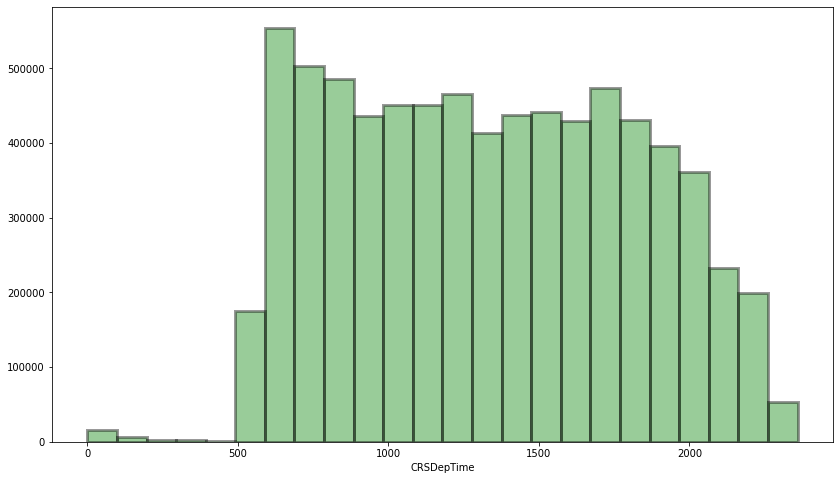

In [ ]:
plt.figure(figsize=(14,8))
sns.distplot(df['CRSDepTime'],bins=24,kde=False,hist_kws={'color':'g','linewidth':3,'edgecolor':'black'})

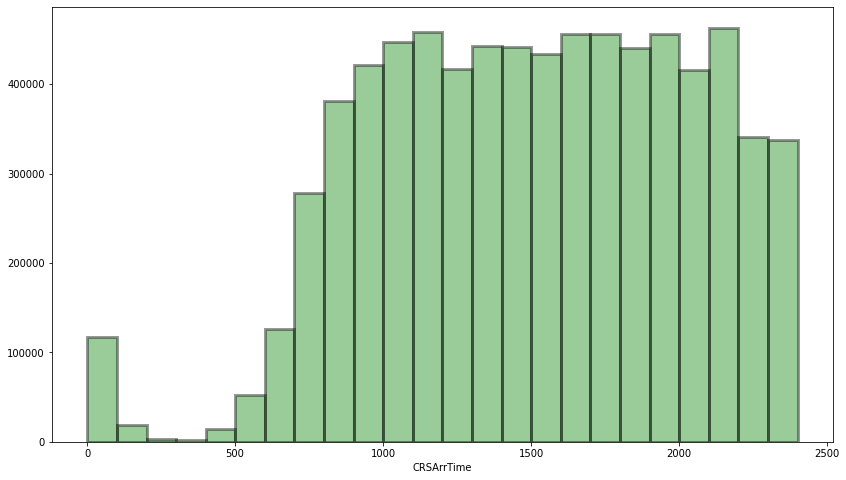

In [ ]:
plt.figure(figsize=(14,8))
sns.distplot(df['CRSArrTime'],bins=24,kde=False,hist_kws={'color':'g','linewidth':3,'edgecolor':'black'})

In [ ]:
#Most flown tail numbers.....

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
%%time
df

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.58 µs


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Origin,OriginCityName,OriginState,OriginStateName,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TrafficDepBlk,TrafficArrBlk
0,2019,1,1,4,5,2019-01-04,OO,N945SW,SBP,"San Luis Obispo, CA",CA,California,SFO,"San Francisco, CA",CA,California,1400,1353.0,-7.0,0.0,0.0,-1.0,1400-1459,9.0,1402.0,1439.0,5.0,1510,1444.0,-26.0,0.0,0.0,-2.0,1500-1559,0.0,NaN,0.0,70.0,51.0,37.0,190.0,1,NaN,NaN,NaN,NaN,NaN,1.0,51.0
1,2019,1,1,4,5,2019-01-04,UA,N66803,DEN,"Denver, CO",CO,Colorado,SFO,"San Francisco, CA",CA,California,1400,1441.0,41.0,41.0,1.0,2.0,1400-1459,9.0,1450.0,1558.0,5.0,1543,1603.0,20.0,20.0,1.0,1.0,1500-1559,0.0,NaN,0.0,163.0,142.0,128.0,967.0,4,0.0,0.0,0.0,0.0,20.0,73.0,51.0
2,2019,1,1,4,5,2019-01-04,WN,N7825A,LAX,"Los Angeles, CA",CA,California,SFO,"San Francisco, CA",CA,California,1435,1433.0,-2.0,0.0,0.0,-1.0,1400-1459,8.0,1441.0,1531.0,6.0,1555,1537.0,-18.0,0.0,0.0,-2.0,1500-1559,0.0,NaN,0.0,80.0,64.0,50.0,337.0,2,NaN,NaN,NaN,NaN,NaN,65.0,51.0
3,2019,1,1,4,5,2019-01-04,DL,N945AT,LAX,"Los Angeles, CA",CA,California,SFO,"San Francisco, CA",CA,California,1400,1359.0,-1.0,0.0,0.0,-1.0,1400-1459,36.0,1435.0,1528.0,3.0,1530,1531.0,1.0,1.0,0.0,0.0,1500-1559,0.0,NaN,0.0,90.0,92.0,53.0,337.0,2,NaN,NaN,NaN,NaN,NaN,65.0,51.0
4,2019,1,1,4,5,2019-01-04,UA,N471UA,LAX,"Los Angeles, CA",CA,California,SFO,"San Francisco, CA",CA,California,1400,1353.0,-7.0,0.0,0.0,-1.0,1400-1459,23.0,1416.0,1512.0,5.0,1529,1517.0,-12.0,0.0,0.0,-1.0,1500-1559,0.0,NaN,0.0,89.0,84.0,56.0,337.0,2,NaN,NaN,NaN,NaN,NaN,65.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422032,2019,4,12,21,6,2019-12-21,WN,N940WN,HOU,"Houston, TX",TX,Texas,HRL,"Harlingen/San Benito, TX",TX,Texas,1125,1125.0,0.0,0.0,0.0,0.0,1100-1159,8.0,1133.0,1224.0,6.0,1240,1230.0,-10.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,75.0,65.0,51.0,277.0,2,NaN,NaN,NaN,NaN,NaN,13.0,2.0
7422033,2019,4,12,21,6,2019-12-21,WN,N775SW,HOU,"Houston, TX",TX,Texas,CRP,"Corpus Christi, TX",TX,Texas,2010,2010.0,0.0,0.0,0.0,0.0,2000-2059,7.0,2017.0,2050.0,4.0,2110,2054.0,-16.0,0.0,0.0,-2.0,2100-2159,0.0,NaN,0.0,60.0,44.0,33.0,187.0,1,NaN,NaN,NaN,NaN,NaN,24.0,1.0
7422034,2019,4,12,21,6,2019-12-21,WN,N7886A,HOU,"Houston, TX",TX,Texas,HRL,"Harlingen/San Benito, TX",TX,Texas,2130,2219.0,49.0,49.0,1.0,3.0,2100-2159,8.0,2227.0,2311.0,2.0,2235,2313.0,38.0,38.0,1.0,2.0,2200-2259,0.0,NaN,0.0,65.0,54.0,44.0,277.0,2,23.0,0.0,0.0,0.0,15.0,20.0,1.0
7422035,2019,4,12,21,6,2019-12-21,WN,N7855A,OAK,"Oakland, CA",CA,California,BOI,"Boise, ID",ID,Idaho,2215,2218.0,3.0,3.0,0.0,0.0,2200-2259,11.0,2229.0,31.0,2.0,45,33.0,-12.0,0.0,0.0,-1.0,0001-0559,0.0,NaN,0.0,90.0,75.0,62.0,512.0,3,NaN,NaN,NaN,NaN,NaN,11.0,2.0


In [ ]:
%%time
df['Tail_Number'].value_counts()

CPU times: user 986 ms, sys: 3.93 ms, total: 990 ms
Wall time: 988 ms


N485HA    3697
N492HA    3608
N481HA    3596
N480HA    3587
N490HA    3485
          ... 
N510DN       1
N501DN       1
N684RW       1
N509DN       1
N225AG       1
Name: Tail_Number, Length: 5891, dtype: int64

In [ ]:
#This operation is taking over 30 minutes.....
#sns.countplot(df[[x in df['Tail_Number'].value_counts()[:100].index.tolist() for x in df['Tail_Number']]])

KeyboardInterrupt: ignored

In [ ]:
#https://www.kaggle.com/python10pm/pandas-100-tricks
df

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Origin,OriginCityName,OriginState,OriginStateName,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TrafficDepBlk,TrafficArrBlk
0,2019,1,1,4,5,2019-01-04,OO,N945SW,SBP,"San Luis Obispo, CA",CA,California,SFO,"San Francisco, CA",CA,California,1400,1353.0,-7.0,0.0,0.0,-1.0,1400-1459,9.0,1402.0,1439.0,5.0,1510,1444.0,-26.0,0.0,0.0,-2.0,1500-1559,0.0,NaN,0.0,70.0,51.0,37.0,190.0,1,NaN,NaN,NaN,NaN,NaN,1.0,51.0
1,2019,1,1,4,5,2019-01-04,UA,N66803,DEN,"Denver, CO",CO,Colorado,SFO,"San Francisco, CA",CA,California,1400,1441.0,41.0,41.0,1.0,2.0,1400-1459,9.0,1450.0,1558.0,5.0,1543,1603.0,20.0,20.0,1.0,1.0,1500-1559,0.0,NaN,0.0,163.0,142.0,128.0,967.0,4,0.0,0.0,0.0,0.0,20.0,73.0,51.0
2,2019,1,1,4,5,2019-01-04,WN,N7825A,LAX,"Los Angeles, CA",CA,California,SFO,"San Francisco, CA",CA,California,1435,1433.0,-2.0,0.0,0.0,-1.0,1400-1459,8.0,1441.0,1531.0,6.0,1555,1537.0,-18.0,0.0,0.0,-2.0,1500-1559,0.0,NaN,0.0,80.0,64.0,50.0,337.0,2,NaN,NaN,NaN,NaN,NaN,65.0,51.0
3,2019,1,1,4,5,2019-01-04,DL,N945AT,LAX,"Los Angeles, CA",CA,California,SFO,"San Francisco, CA",CA,California,1400,1359.0,-1.0,0.0,0.0,-1.0,1400-1459,36.0,1435.0,1528.0,3.0,1530,1531.0,1.0,1.0,0.0,0.0,1500-1559,0.0,NaN,0.0,90.0,92.0,53.0,337.0,2,NaN,NaN,NaN,NaN,NaN,65.0,51.0
4,2019,1,1,4,5,2019-01-04,UA,N471UA,LAX,"Los Angeles, CA",CA,California,SFO,"San Francisco, CA",CA,California,1400,1353.0,-7.0,0.0,0.0,-1.0,1400-1459,23.0,1416.0,1512.0,5.0,1529,1517.0,-12.0,0.0,0.0,-1.0,1500-1559,0.0,NaN,0.0,89.0,84.0,56.0,337.0,2,NaN,NaN,NaN,NaN,NaN,65.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422032,2019,4,12,21,6,2019-12-21,WN,N940WN,HOU,"Houston, TX",TX,Texas,HRL,"Harlingen/San Benito, TX",TX,Texas,1125,1125.0,0.0,0.0,0.0,0.0,1100-1159,8.0,1133.0,1224.0,6.0,1240,1230.0,-10.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,75.0,65.0,51.0,277.0,2,NaN,NaN,NaN,NaN,NaN,13.0,2.0
7422033,2019,4,12,21,6,2019-12-21,WN,N775SW,HOU,"Houston, TX",TX,Texas,CRP,"Corpus Christi, TX",TX,Texas,2010,2010.0,0.0,0.0,0.0,0.0,2000-2059,7.0,2017.0,2050.0,4.0,2110,2054.0,-16.0,0.0,0.0,-2.0,2100-2159,0.0,NaN,0.0,60.0,44.0,33.0,187.0,1,NaN,NaN,NaN,NaN,NaN,24.0,1.0
7422034,2019,4,12,21,6,2019-12-21,WN,N7886A,HOU,"Houston, TX",TX,Texas,HRL,"Harlingen/San Benito, TX",TX,Texas,2130,2219.0,49.0,49.0,1.0,3.0,2100-2159,8.0,2227.0,2311.0,2.0,2235,2313.0,38.0,38.0,1.0,2.0,2200-2259,0.0,NaN,0.0,65.0,54.0,44.0,277.0,2,23.0,0.0,0.0,0.0,15.0,20.0,1.0
7422035,2019,4,12,21,6,2019-12-21,WN,N7855A,OAK,"Oakland, CA",CA,California,BOI,"Boise, ID",ID,Idaho,2215,2218.0,3.0,3.0,0.0,0.0,2200-2259,11.0,2229.0,31.0,2.0,45,33.0,-12.0,0.0,0.0,-1.0,0001-0559,0.0,NaN,0.0,90.0,75.0,62.0,512.0,3,NaN,NaN,NaN,NaN,NaN,11.0,2.0


In [ ]:
%%time
df.groupby(by='Tail_Number')[['Year']].count().sort_values(by='Year',ascending=False)

In [ ]:
%%time
sns.distplot(df['Distance'],)

In [ ]:

sns.distplot(df['ActualElapsedTime'])

In [ ]:
sns.countplot(df['DayOfWeek'])

In [ ]:
df['OriginStateName'].value_counts()

In [ ]:
#from where do flights go to the bottom 3 least popular states like U.S. Pacific Trust Territories and Possessions 

In [ ]:
!pip install hvplot

     |████████████████████████████████| 3.0MB 5.6MB/s 
     |████████████████████████████████| 1.6MB 46.0MB/s 


In [ ]:
df.plot(backend='hvplot',kind = "hist")

KeyboardInterrupt: ignored